In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from scipy.cluster import hierarchy
from scipy import cluster

In [2]:
#读取文件
df = pd.read_table('stat_res_eh_vs_oh1.csv',sep=',')
df.head()

,groups,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Acidovorax sp. MR-S7,1095.073186,5.766308,1.809292,3.187052,0.001437,0.014732
1,Acinetobacter sp. 1578804,1131.502352,-1.241217,1.442680,-0.860355,0.389593,0.626405
2,Actinomyces dentalis DSM 19115,393.690668,4.725353,1.751956,2.697186,0.006993,0.044109
3,Actinomyces sp. ICM47,1338.973823,1.597399,1.538960,1.037973,0.299283,0.533504
4,Actinomyces sp. oral taxon 180 str. F0310,577.113611,0.677490,1.594461,0.424902,0.670908,0.821111


In [3]:
cut_off_pvalue = 0.0000001
cut_off_log2FC = 1

In [4]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
import matplotlib as mpl
import math
%matplotlib inline

In [5]:
df.loc[(df.log2FoldChange>1)&(df.padj<0.05),'type']='up'
df.loc[(df.log2FoldChange<-1)&(df.padj<0.05),'type']='down'
df.loc[(abs(df.log2FoldChange)<=1)|(df.padj>=0.05),'type']='nosig'

In [6]:
df.head()

,groups,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,type
0,Acidovorax sp. MR-S7,1095.073186,5.766308,1.809292,3.187052,0.001437,0.014732,up
1,Acinetobacter sp. 1578804,1131.502352,-1.241217,1.442680,-0.860355,0.389593,0.626405,nosig
2,Actinomyces dentalis DSM 19115,393.690668,4.725353,1.751956,2.697186,0.006993,0.044109,up
3,Actinomyces sp. ICM47,1338.973823,1.597399,1.538960,1.037973,0.299283,0.533504,nosig
4,Actinomyces sp. oral taxon 180 str. F0310,577.113611,0.677490,1.594461,0.424902,0.670908,0.821111,nosig


In [7]:
df

,groups,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,type
0,Acidovorax sp. MR-S7,1095.073186,5.766308,1.809292,3.187052,0.001437,0.014732,up
1,Acinetobacter sp. 1578804,1131.502352,-1.241217,1.442680,-0.860355,0.389593,0.626405,nosig
2,Actinomyces dentalis DSM 19115,393.690668,4.725353,1.751956,2.697186,0.006993,0.044109,up
3,Actinomyces sp. ICM47,1338.973823,1.597399,1.538960,1.037973,0.299283,0.533504,nosig
4,Actinomyces sp. oral taxon 180 str. F0310,577.113611,0.677490,1.594461,0.424902,0.670908,0.821111,nosig
...,...,...,...,...,...,...,...,...
104,Streptomyces griseorubens,1040.260290,4.462746,1.513543,2.948543,0.003193,0.026181,up
105,Tyzzerella nexilis DSM 1787,1506.935293,0.247982,2.625443,0.094454,NaN,NaN,nosig
106,Veillonella sp. 3_1_44,1627.565058,0.446459,2.632724,0.169580,NaN,NaN,nosig
107,Veillonella sp. 6_1_27,763.841397,-1.985296,1.835481,-1.081621,0.279421,0.509167,nosig


In [8]:
df.type.value_counts()

nosig    71
up       12
down      8
Name: type, dtype: int64

In [9]:
df['p']=-df.padj.apply(math.log10)

In [10]:
df[['log2FoldChange','pvalue','type','padj','p']].head()

,log2FoldChange,pvalue,type,padj,p
0,5.766308,0.001437,up,0.014732,1.831727
1,-1.241217,0.389593,nosig,0.626405,0.203145
2,4.725353,0.006993,up,0.044109,1.355477
3,1.597399,0.299283,nosig,0.533504,0.272862
4,0.677490,0.670908,nosig,0.821111,0.085598


In [12]:
#提取df的Sample列和p列
df1=df[['log2FoldChange','groups','p']]
df1

,log2FoldChange,groups,p
0,5.766308,Acidovorax sp. MR-S7,1.831727
1,-1.241217,Acinetobacter sp. 1578804,0.203145
2,4.725353,Actinomyces dentalis DSM 19115,1.355477
3,1.597399,Actinomyces sp. ICM47,0.272862
4,0.677490,Actinomyces sp. oral taxon 180 str. F0310,0.085598
...,...,...,...
104,4.462746,Streptomyces griseorubens,1.582020
105,0.247982,Tyzzerella nexilis DSM 1787,NaN
106,0.446459,Veillonella sp. 3_1_44,NaN
107,-1.985296,Veillonella sp. 6_1_27,0.293140


In [13]:
#删除df1含有NaN的行
df1.dropna(inplace=True)
df1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7588\3271422247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,log2FoldChange,groups,p
0,5.766308,Acidovorax sp. MR-S7,1.831727
1,-1.241217,Acinetobacter sp. 1578804,0.203145
2,4.725353,Actinomyces dentalis DSM 19115,1.355477
3,1.597399,Actinomyces sp. ICM47,0.272862
4,0.677490,Actinomyces sp. oral taxon 180 str. F0310,0.085598
...,...,...,...
102,-0.501404,Streptococcus dysgalactiae subsp. equisimilis ...,0.085598
103,-7.205089,Streptococcus vestibularis F0396,2.592959
104,4.462746,Streptomyces griseorubens,1.582020
107,-1.985296,Veillonella sp. 6_1_27,0.293140


In [14]:
#df1按照p列进行排序
df1.sort_values(by='p',inplace=True)
df1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7588\3299790429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,log2FoldChange,groups,p
81,-0.155888,Prevotella pleuritidis JCM 14110,0.025493
26,-0.181813,Clostridium botulinum CDC66177,0.025493
25,-0.286070,Clostridium acetobutylicum ATCC 824,0.039043
55,-0.407255,Mogibacterium sp. CM50,0.047556
42,0.284360,Gemella sanguinis M325,0.047556
...,...,...,...
103,-7.205089,Streptococcus vestibularis F0396,2.592959
34,-7.582039,Eikenella corrodens CC92I,3.154968
53,-8.904578,Mesorhizobium sp. LSJC265A00,4.746062
89,-10.173905,Rhizobium vignae,6.934891


In [15]:
#df1按照p列进行降序排序
df1.sort_values(by='p',ascending=False,inplace=True)
df1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7588\4039153760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,log2FoldChange,groups,p
95,-12.904504,Slackia exigua ATCC 700122,11.386707
89,-10.173905,Rhizobium vignae,6.934891
53,-8.904578,Mesorhizobium sp. LSJC265A00,4.746062
34,-7.582039,Eikenella corrodens CC92I,3.154968
103,-7.205089,Streptococcus vestibularis F0396,2.592959
...,...,...,...
42,0.284360,Gemella sanguinis M325,0.047556
55,-0.407255,Mogibacterium sp. CM50,0.047556
25,-0.286070,Clostridium acetobutylicum ATCC 824,0.039043
26,-0.181813,Clostridium botulinum CDC66177,0.025493


In [18]:
#提取df1的前7行
df2=df1.head(8)
df2

,log2FoldChange,groups,p
95,-12.904504,Slackia exigua ATCC 700122,11.386707
89,-10.173905,Rhizobium vignae,6.934891
53,-8.904578,Mesorhizobium sp. LSJC265A00,4.746062
34,-7.582039,Eikenella corrodens CC92I,3.154968
103,-7.205089,Streptococcus vestibularis F0396,2.592959
61,4.963740,Neisseria sicca VK64,2.138523
83,-6.537894,Prevotella sp. MSX73,2.010036
0,5.766308,Acidovorax sp. MR-S7,1.831727


In [16]:
#df2删除含有Capnocytophaga sp. HMT 412的行
df3=df2[df2.Sample!='Capnocytophaga sp. HMT 412']
df3

,log2FoldChange,Sample,p
139,-12.983156,Stenotrophomonas maltophilia,22.304825
117,11.831032,TM7 phylum sp. oral taxon 353,21.175711
86,10.581000,Staphylococcus pettenkoferi,15.240135
315,-4.963917,Mogibacterium pumilum,11.403306
78,11.189623,Neisseria oralis,10.931186
357,-4.191657,Slackia exigua,9.647461


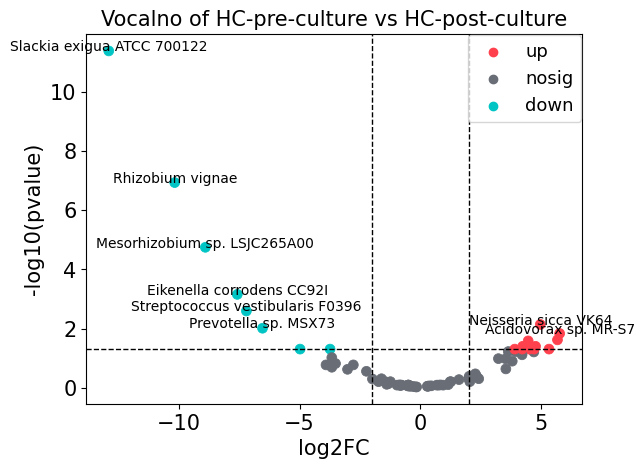

In [23]:
colors = ["#ff414d", "#686d76","#01c5c4"]
sns.set_palette(sns.color_palette(colors))
ax=sns.scatterplot(x='log2FoldChange', y='p',data=df,
                hue='type',#颜色映射
                edgecolor = None,#点边界颜色
                s=50,#点大小
                )
ax.set_title("Vocalno of HC-pre-culture vs HC-post-culture",fontsize=15)
#纵坐标字体大小变大
ax.yaxis.set_tick_params(labelsize=15)
#横坐标字体大小变大
ax.xaxis.set_tick_params(labelsize=15)
ax.set_xlabel("log2FC",fontsize=15)
ax.set_ylabel("-log10(pvalue)",fontsize=15)
ax.legend(loc='center right', bbox_to_anchor=(1.016,0.88), ncol=1, fontsize=13)

for i, row in df2.iterrows():
    ax.text(row['log2FoldChange'], row['p'], row['groups'], horizontalalignment='center', size=10, color='black')

#Y轴在1.3的位置添加一条横的虚线
ax.axhline(y=1.3,ls="--",c="black",linewidth=1)
#X轴在-2和2的位置添加一条竖的虚线
ax.axvline(x=-2,ls="--",c="black",linewidth=1)
ax.axvline(x=2,ls="--",c="black",linewidth=1)
fig = ax.get_figure()
plt.savefig('Vocalno HC-pre-culture vs HC-post-culture1.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [18]:
#计算-log10(2)等于多少
import math
math.log10(20)

1.3010299956639813

In [19]:
#在图中显示down和up点在Genomic bins列的值
for i in range(df.shape[0]):
    if df.loc[i,'type']=='up' or df.loc[i,'type']=='down':
        ax.text(df.loc[i,'log2FoldChange'],df.loc[i,'p'],df.loc[i,'Genomic bins'],fontsize=8)

KeyError: 'Genomic bins'